# Install all necessary packages

In [9]:
pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install bing-image-downloader

  Using cached bing_image_downloader-1.0.4-py3-none-any.whl (5.0 kB)
Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install tensorflow

     |████████████████████████████████| 394.3 MB 39 kB/s  eta 0:00:011     |███████████████▍                | 189.5 MB 10.6 MB/s eta 0:00:20
     |████████████████████████████████| 1.0 MB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 9.3 MB/s eta 0:00:01
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 14.8 MB 11.8 MB/s eta 0:00:01
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using

In [13]:
## import random stuff 

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image

In [15]:
import os
os.sys.path

['/home/gaia/my_project_dir',
 '/home/gaia/anaconda3/lib/python37.zip',
 '/home/gaia/anaconda3/lib/python3.7',
 '/home/gaia/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/home/gaia/anaconda3/lib/python3.7/site-packages',
 '/home/gaia/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/gaia/.ipython']

In [16]:
## import two dataset from bing (I manually put them in the right directory after that, so we can fix this eventually)

In [17]:
##(also not copied from the tutorial)

In [1]:
from bing_image_downloader import downloader
downloader.download('gold grape fruit', limit=100,  output_dir='grapefruit', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/736x/43/90/f3/4390f3eeefc0f6d3090aba0ba515979a--brown-boston-terrier-portrait-photographers.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://2.bp.blogspot.com/-zeyoPR89B-s/UOQnEYQdD5I/AAAAAAAAMJQ/UAQlUV8dN3U/s1600/36745-Boxer-dog-sitting-white-background.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/ca/a9/1d/caa91d908cb0956b75757493a180e613.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://live.staticflickr.com/4022/4393063619_c2bd38f09d_b.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.easypetmd.com/sites/default/files/Smooth Fox Terrier (1).jpg
[!] Issue getting: http://www.easypetmd.com/sites/default/files/Smooth Fox Terrier (1).jpg
[!] Error:: URL can't contain control characters. '/sites/default/files/Smooth Fox Terrier (1).jpg' (found at least ' ')
[%] Downloading Image #5 from https://

[%] File Downloaded !

[%] Downloading Image #50 from https://live.staticflickr.com/4022/4393063619_c2bd38f09d_b.jpg
[%] File Downloaded !



[!!]Indexing page: 6

[%] Indexed 8 Images on Page 6.


[%] Downloading Image #51 from http://puppydogweb.com/gallery/landseers/landseer_k1.jpg
[%] File Downloaded !

[%] Downloading Image #52 from https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[%] File Downloaded !

[%] Downloading Image #53 from https://i.pinimg.com/736x/7f/ef/f9/7feff9076ce66a79cfb34752eb4a6792--cute-little-animals-cutest-animals.jpg
[%] File Downloaded !

[%] Downloading Image #54 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Husky-Puppies-23.jpg
[%] File Downloaded !

[%] Downloading Image #55 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[%] File Downloaded !

[%] Downloading Image #56 from http://www.petpaw.com.au/wp-content/uploads/2014/03/Australian-Shepherd-5.jpg
[%] File Downloaded 

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

[!] Issue getting: https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Issue getting: https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/05/449384322441a2b6ef1fe2fecddb8bea.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Issue getting: https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[!] Error:: [Errno 2] No such file or directory: '/home/gaia/my_project_dir/dataset/white terrier/Image_79.jpg'
[%] Downloading Image #79 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Hu

KeyboardInterrupt: 

In [20]:
from bing_image_downloader import downloader
downloader.download('lemon picture', limit=100,  output_dir='lemon', 
adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/736x/43/90/f3/4390f3eeefc0f6d3090aba0ba515979a--brown-boston-terrier-portrait-photographers.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://2.bp.blogspot.com/-zeyoPR89B-s/UOQnEYQdD5I/AAAAAAAAMJQ/UAQlUV8dN3U/s1600/36745-Boxer-dog-sitting-white-background.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/ca/a9/1d/caa91d908cb0956b75757493a180e613.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://live.staticflickr.com/4022/4393063619_c2bd38f09d_b.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.easypetmd.com/sites/default/files/Smooth Fox Terrier (1).jpg
[!] Issue getting: http://www.easypetmd.com/sites/default/files/Smooth Fox Terrier (1).jpg
[!] Error:: URL can't contain control characters. '/sites/default/files/Smooth Fox Terrier (1).jpg' (found at least ' ')
[%] Downloading Image #5 from https://

[%] File Downloaded !

[%] Downloading Image #50 from https://live.staticflickr.com/4022/4393063619_c2bd38f09d_b.jpg
[%] File Downloaded !



[!!]Indexing page: 6

[%] Indexed 8 Images on Page 6.


[%] Downloading Image #51 from http://puppydogweb.com/gallery/landseers/landseer_k1.jpg
[%] File Downloaded !

[%] Downloading Image #52 from https://www.petpaw.com.au/wp-content/uploads/2012/11/Cornish-Rex-black-and-white-772x1030.jpg
[%] File Downloaded !

[%] Downloading Image #53 from https://i.pinimg.com/736x/7f/ef/f9/7feff9076ce66a79cfb34752eb4a6792--cute-little-animals-cutest-animals.jpg
[%] File Downloaded !

[%] Downloading Image #54 from https://weneedfun.com/wp-content/uploads/2016/12/Siberian-Husky-Puppies-23.jpg
[%] File Downloaded !

[%] Downloading Image #55 from https://thumbs.dreamstime.com/x/cozy-small-grey-dog-14217460.jpg
[%] File Downloaded !

[%] Downloading Image #56 from http://www.petpaw.com.au/wp-content/uploads/2014/03/Australian-Shepherd-5.jpg
[%] File Downloaded 

SyntaxError: invalid syntax (<ipython-input-10-e17b9332a181>, line 1)

In [ ]:
## create a train a validation set (also not taken from the tutorial but from stackoverflow)

In [48]:
img_height = 64
img_width = 64
batch_size = 3
path = "/home/gaia/my_project_dir/dataset2"

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    path, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

#model.fit_generator(
 #   train_generator,
  #  steps_per_epoch = train_generator.samples // batch_size,
   # validation_data = validation_generator, 
    #validation_steps = validation_generator.samples // batch_size,
    #epochs = nb_epochs)

Found 278 images belonging to 2 classes.
Found 69 images belonging to 2 classes.


In [49]:
## create a model

In [50]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3),activation='relu',input_shape = (img_height, img_width, batch_size)), tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(32, (3,3),activation='relu',input_shape = (img_height, img_width, batch_size)), tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3),activation='relu',input_shape = (img_height, img_width, batch_size)), tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation = 'relu'),
                                   tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [51]:
## compile our model. Since there are two classes, we have used loss = ‘binary_crossentropy’.

In [52]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
         metrics =['accuracy'] )

In [53]:
## train the model

In [54]:
model_fit = model.fit(train_generator,
                     epochs = 30,
                     validation_data = validation_generator)

Epoch 1/30
93/93 [==============================] - 2s 17ms/step - loss: 0.7661 - accuracy: 0.5054 - val_loss: 0.6799 - val_accuracy: 0.6377
Epoch 2/30
93/93 [==============================] - 1s 15ms/step - loss: 0.6921 - accuracy: 0.5920 - val_loss: 0.6582 - val_accuracy: 0.5797
Epoch 3/30
93/93 [==============================] - 1s 15ms/step - loss: 0.6820 - accuracy: 0.5857 - val_loss: 0.6003 - val_accuracy: 0.7246
Epoch 4/30
93/93 [==============================] - 1s 15ms/step - loss: 0.6429 - accuracy: 0.6780 - val_loss: 0.5299 - val_accuracy: 0.7391
Epoch 5/30
93/93 [==============================] - 1s 15ms/step - loss: 0.6253 - accuracy: 0.7017 - val_loss: 0.5372 - val_accuracy: 0.7681
Epoch 6/30
93/93 [==============================] - 1s 15ms/step - loss: 0.5941 - accuracy: 0.6671 - val_loss: 0.5038 - val_accuracy: 0.7536
Epoch 7/30
93/93 [==============================] - 1s 15ms/step - loss: 0.5839 - accuracy: 0.7139 - val_loss: 0.6851 - val_accuracy: 0.6957
Epoch 8/30
93

93/93 - 1s - loss: 0.1004 - accuracy: 0.9748


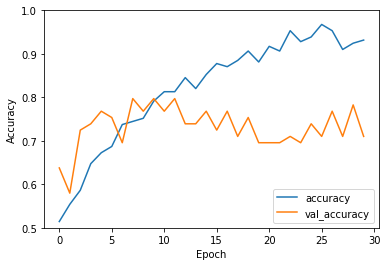

In [55]:
history = model_fit
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(train_generator, verbose=2)

In [ ]:
## still have to finish this part cause I don't have a train dataset and also the lemon and yellow grapefruit were too similar, we can use whatever. 

In [ ]:
dir_path = ''
for i in os.listdir(dir_path):
    img = image.load_img(dir_path='//'+i)#, target_size = (64,64))
    plt.imshow(img)
    plt.show()
    img_pred = image.load_img(dir_path='//'+i), target_size = (64,64))
    img_pred = image.img_to_array(img_pred)
    img_pred + np.expand_dims(img_pred, axis = 0)
    val = model.predict(img_pred)

In [20]:
from tensorflow.keras import datasets, layers, models

In [21]:
###second try https://www.tensorflow.org/tutorials/images/cnn


In [ ]:
img_height = 64
img_width = 64
batch_size = 3
path = "/home/gaia/my_project_dir/dataset2"

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    path, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

#model.fit_generator(
 #   train_generator,
  #  steps_per_epoch = train_generator.samples // batch_size,
   # validation_data = validation_generator, 
    #validation_steps = validation_generator.samples // batch_size,
    #epochs = nb_epochs)

In [40]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [41]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
model_fit = model.fit(train_generator,
                     epochs = 30,
                     validation_data = validation_generator)

Epoch 1/30
93/93 [==============================] - 2s 18ms/step - loss: 0.9647 - accuracy: 0.4489 - val_loss: 0.6424 - val_accuracy: 0.6667
Epoch 2/30
93/93 [==============================] - 2s 17ms/step - loss: 0.7121 - accuracy: 0.5372 - val_loss: 0.8267 - val_accuracy: 0.5072
Epoch 3/30
93/93 [==============================] - 2s 17ms/step - loss: 0.7336 - accuracy: 0.5197 - val_loss: 0.7713 - val_accuracy: 0.5072
Epoch 4/30
93/93 [==============================] - 2s 18ms/step - loss: 0.7129 - accuracy: 0.5888 - val_loss: 0.5908 - val_accuracy: 0.6522
Epoch 5/30
93/93 [==============================] - 2s 17ms/step - loss: 0.6643 - accuracy: 0.5885 - val_loss: 0.4980 - val_accuracy: 0.8261
Epoch 6/30
93/93 [==============================] - 2s 17ms/step - loss: 0.6204 - accuracy: 0.6370 - val_loss: 0.4977 - val_accuracy: 0.8406
Epoch 7/30
93/93 [==============================] - 2s 17ms/step - loss: 0.5993 - accuracy: 0.6616 - val_loss: 0.4378 - val_accuracy: 0.8261
Epoch 8/30
93

93/93 - 1s - loss: 0.1397 - accuracy: 0.9604


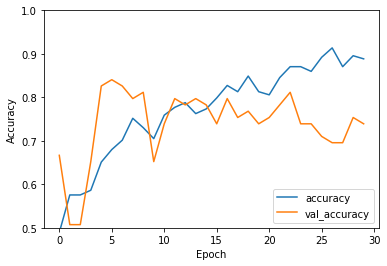

In [47]:
history = model_fit
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(train_generator, verbose=2)